In [1]:
import pandas as pd 
import urllib.request, json
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

In [2]:
# Read dataset from URL 
url = 'https://raw.githubusercontent.com/mahmoudparsian/machine-learning-course/master/data/iris/iris.csv'
dataset=pd.read_csv(url, encoding ='latin1')

In [3]:
# Preview the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Get basic information about dataset, as following showed there are not null values, not need to fill null value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
dataset.shape

(150, 5)

In [6]:
# See the statistical detail of this dataser
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# (A) Run the K-means algorithm and compute the accuracy of your clustering. 

In [7]:
# Get all unique classes
dataset["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# Convert species names (string) to numbers (mapping)
dataset['species'] = pd.Categorical(dataset["species"])
dataset["species"] = dataset["species"].cat.codes

In [9]:
# Get new data shape
dataset.shape

(150, 5)

In [10]:
# Preview the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Get the X value
X = dataset.values[:, 0:4]

In [12]:
# Get the y value
y = dataset.values[:, 4]

## Run the K-means algorithm by initial clustering number (initial clustering number = 2)

In [13]:
kmeans = KMeans(n_clusters=2)
# Fit the input data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
# Get the predict y value
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
# Get centroid values
centroids = kmeans.cluster_centers_
centroids

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

## The accuracy of the clustering is following: 

In [16]:
# Get the accuracy of this clustering (2)
print(accuracy_score(dataset['species'],kmeans.labels_))

0.6466666666666666


### When k value = 2, this clustering will have 64.7% rate to correctly predict.

# (B) You should also compute the confusion matrix for this clustering. (k value = 2)

In [17]:
# Get the confusion matrix (k value = 2)
print(confusion_matrix(dataset['species'],kmeans.labels_))

[[50  0  0]
 [ 3 47  0]
 [ 0 50  0]]


### The columns of confusion matrix are predicted labels (class 1, class 2). The rows of confusion matrix are true labels (setosa, versicolor, virginica). 

# (C) Run K-means algorithm 50 times over the Iris dataset, each time using a different initialization.

In [20]:
wcss = [] #within cluster sum of squares
score= []
num_of_clusters = range(1,50)

for i in num_of_clusters:
    kmeans = KMeans(i)
    kmeans.fit(X)
    y_pred=kmeans.predict(X)
    score.append(accuracy_score(dataset['species'],kmeans.labels_))
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

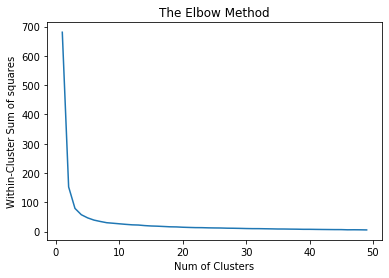

In [21]:
plt.plot(num_of_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('Within-Cluster Sum of squares')
plt.show

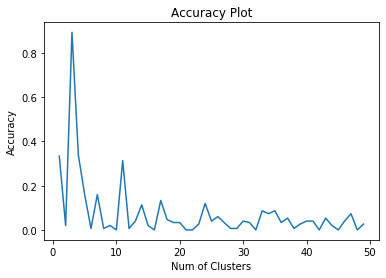

In [22]:
plt.plot(num_of_clusters,score)
plt.title('Accuracy Plot')
plt.xlabel("Num of Clusters")
plt.ylabel("Accuracy")
plt.show()

### As above plot showed, when clustering number = 3, we will get elbow point of K and highest accuracy value. Besides, there are three unique classes showed above. Therefore, the final clustering number will be 3. Let's run the clustering again set K value as 3

In [23]:
kmeans = KMeans(n_clusters=3)
# Fit the input data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
# Get the predict y value
y_new_pred = kmeans.predict(X)
y_new_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [25]:
# Get the classification report (k value = 3)
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(dataset['species'],kmeans.labels_,target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [26]:
# Get the accuracy of this clustering (k value = 3)
print(accuracy_score(dataset['species'],kmeans.labels_))

0.8933333333333333


### This accuracy score much higher than previous one. Therefore, the 3 is optimal k value

In [27]:
# Get the confusion matrix (k value = 2)
print(confusion_matrix(dataset['species'],kmeans.labels_))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


### The columns of confusion matrix are predicted labels (setosa, versicolor, virginica). The rows of confusion matrix are true labels (setosa, versicolor, virginica). For exapmle, in this clustering, there are 50 setosa correctly predicted as setosa. there are 48 versicolor correctly predicted as versicolor. There are 36 virginica correctly predicted as virginica. Unfortunaly, this clustering have some miss predicted values. For example, there are 14 ture versicolor falsely predicted as virginica. there are 2 virginica falsely predicted as versicolor. 